### Linear regression and bootstrap sampling  
We treat the data sample we have as the only representation of the population that we have. Then to get more datasets from it, we resample the data with replacement.
For example, say we polled a classroom of 20 students on how old the teacher is. Their 20 answers are simulated below:

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [2]:
%matplotlib inline

In [3]:
# 20 students guesses of a teacher´s age
teacher_age = [24,40,27,33,31,35,33,32,29,34,39,40,41,36,34,35,29,30,35,98]

# expected age could be the average
teacher_avg = np.mean(teacher_age)
print(f'average of teacher age guesses: {teacher_avg} years old')

teacher_sd = np.std(teacher_age)
print(f'Std_dev of teacher age guesses: {teacher_sd} years')
print(len(teacher_age))

average of teacher age guesses: 36.75 years old
Std_dev of teacher age guesses: 14.71011556718709 years
20


In [5]:
print(teacher_avg)

36.75


In [36]:
l1 = []

for i in teacher_age:
    if i > teacher_avg:
        l1.append(i)
    else:
        continue

print(f'There are only {len(l1)} ages (out of total {len(teacher_age)}) that are above the average of teacher´s age ({teacher_avg}) of and these are: {l1}')

There are only 5 ages (out of total 20) that are above the average of teacher´s age (36.75) of and these are: [40, 39, 40, 41, 98]


Only 5 guesses are above average, due to outlier of 98 years. We could consier dropping the outlier to get a better guess, we can also use bootstrap re-sampling to get more data that approaches the parent distribution. We will repeatedly sample **with replacement** to get a set of subsample. Each subsample will also have 20 data points, the same as the original. When sampling with replacement, it is possible but not very likely, to get a subsample that has the outlier picked several times. We set the flag `replace=True` flag in `np.random.choice`.

In [38]:
n_sets = 100
n_samples = len(teacher_age)

# create function
def generate_samples(dataset, n):
    return list(np.random.choice(dataset, size=n, replace=True))

# generate samples
boot_samples = [generate_samples(teacher_age, n_samples) for _ in range(n_sets)]

print('Here are the top 3 samples generated:')
print(f'{boot_samples[0:3]}, ...')

Here are the top 3 samples generated:
[[27, 36, 40, 41, 32, 32, 40, 33, 35, 98, 34, 98, 40, 35, 32, 35, 36, 33, 39, 34], [36, 35, 32, 24, 35, 39, 31, 33, 35, 98, 29, 30, 39, 34, 35, 35, 35, 30, 39, 24], [35, 29, 32, 40, 29, 29, 33, 34, 40, 33, 31, 33, 31, 98, 40, 32, 31, 30, 31, 36]], ...


Now we calculate the mean and standard deviation of each sample and then output the average of the averaged means and the average of the 100 subsampled standard deviations

In [39]:
sample_means = [np.mean(x) for x in boot_samples]
sample_stdev = [np.std(x) for x in boot_samples]

# take the average of all the means
set_mean = np.mean(sample_means)
set_stdev = np.mean(sample_stdev)

print(f'Average of the sample averages: {set_mean}')
print(f'Average of the sample st. devs: {set_stdev}')

Average of the sample averages: 37.072500000000005
Average of the sample st. devs: 13.030371521622515


As we can see so far bootstrapping has barely changed anything. The sample averages of the sets are very similar (which we expect), but we also have not done much with the 100 subsamples we created.  
  
Let us create a function that drops the lowest and highest N elements from the subsamples and apply this function to each sample and then investigate the averages and standard deviations of all the bootstrapped samples:

In [48]:
def trim_mean(dataset, n):
    # sort dataset in ascending order
    sorted_list = sorted(dataset)
    # trim the list (each list is of size: 20 - 2 = 18)
    trimmed_list = sorted_list[n:(len(sorted_list) -n)]
    return(trimmed_list)

In [49]:
# apply function to all n(100) samples
boot_trims = [trim_mean(x, 1) for x in boot_samples]

# each sample mean and st dev
trimmed_means = [np.mean(x) for x in boot_trims]
trimmed_stdevs = [np.std(x) for x in boot_trims]

# average of all the means
trimmed_mean_avg = np.mean(trimmed_means)
# and the vareage of all the standard deviations
trimmed_stdev = np.mean(trimmed_stdevs)

print(f'Average of the sample averages: {trimmed_mean_avg}')
print(f'Average of the sample std_devs: {trimmed_stdev}')

Average of the sample averages: 35.45277777777777
Average of the sample std_devs: 7.996777411759178


C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


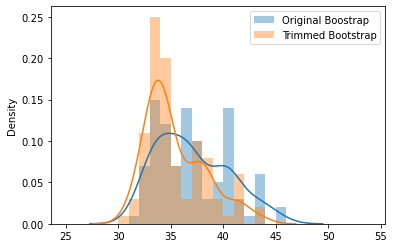

In [50]:
import seaborn as sns

bins = [x for x in range(25, 55)]

ax = sns.distplot(sample_means, bins, label='Original Boostrap')
ax = sns.distplot(trimmed_means, bins, label='Trimmed Bootstrap')
ax.legend(loc='upper right')
plt.show()

Notice with the Trimmed means we have fewer outlier data to the right

The multi-modality (multiple peaks) are an artifact of the subsampling — they are heavily influenced by the random data subsampled, but overall the data appear to be normally distributed.
How do the distributions differ if we trim more data points? Let us find out:

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

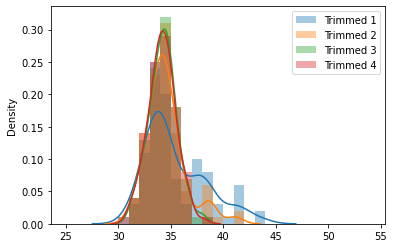

In [71]:
# create different trimmed means using function trim_mean
boot_trim1 = [trim_mean(x, 1) for x in boot_samples]
boot_trim2 = [trim_mean(x, 2) for x in boot_samples]
boot_trim3 = [trim_mean(x, 3) for x in boot_samples]
boot_trim4 = [trim_mean(x, 4) for x in boot_samples]
# sample each mean and std dev
trimmed_mean1 = [np.mean(x) for x in boot_trim1]
trimmed_stdev1 = [np.std(x) for x in boot_trim1]
trimmed_mean2 = [np.mean(x) for x in boot_trim2]
trimmed_stdev2 = [np.std(x) for x in boot_trim2]
trimmed_mean3 = [np.mean(x) for x in boot_trim3]
trimmed_stdev3 = [np.std(x) for x in boot_trim3]
trimmed_mean4 = [np.mean(x) for x in boot_trim4]
trimmed_stdev4 = [np.std(x) for x in boot_trim4]
# plot the means
bins = [x for x in range(25, 55)]
ax = sns.distplot(trimmed_mean1, bins, label='Trimmed 1') #trim most #extreme min and max values
ax = sns.distplot(trimmed_mean2, bins, label='Trimmed 2')
ax = sns.distplot(trimmed_mean3, bins, label='Trimmed 3')
ax = sns.distplot(trimmed_mean4, bins, label='Trimmed 4') # trim 4 #most extreme min and max values
ax.legend(loc='upper right')
plt.show()

**Bootstrapping Regression**  
The bootstrap method can be applied to regression models. Bootstrapping a regression model gives insight into how variable the model parameters are. It is useful to know how much random variation there is in regression coefficients simply because of small changes in data values.
As with most statistics, it is possible to bootstrap almost any regression model. However, since bootstrap resampling uses a large number of subsamples, it can be computationally intensive.
N.B: For large-scale problems, it is necessary to use other resampling methods like k-fold cross-validation. Happy Data Science Land (nee Physics Land) is not the same grey world of floating-point inaccuracies and compromises need to be made.
Let us create our data and fit the linear regression:

Intercept, x-slopes: Intercept    2.623991
x            0.918340
dtype: float64


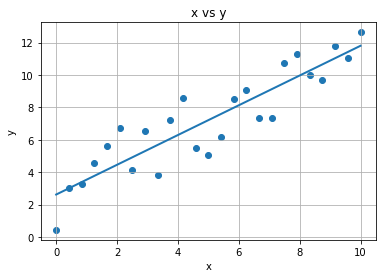

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

# synthetic sample data
n_points = 25
x = np.linspace(0, 10, n_points)
y = x + (np.random.rand(len(x)) * 5)
# create pd data frame out of the arrays
data_df = pd.DataFrame({'x': x, 'y': y})

# ols regression
ols_model = sm.ols(formula = 'y ~ x', data = data_df)

results = ols_model.fit()

# coefficients
print(f'Intercept, x-slopes: {results.params}')
y_pred = ols_model.fit().predict(data_df['x'])

# plot results
plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.show()

In [73]:
data_df.head()

,x,y
0,0.000000,0.439988
1,0.416667,3.028892
2,0.833333,3.267381
3,1.250000,4.549948
4,1.666667,5.639669


**Resample points**  
The first type of bootstrapping to perform is parametric resampling. Parametric because our model has a parameter, the mean, which we are trying to estimate.
The pandas `sample` function will help us with this process:


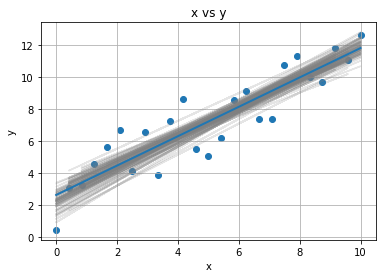

In [74]:
# resample with replacement each row
boot_slopes = []
boot_interc = []
n_boots = 100
plt.figure()
for _ in range(n_boots):
 # sample the rows, same size, with replacement
 sample_df = data_df.sample(n=n_points, replace=True)
 # fit a linear regression
 ols_model_temp = sm.ols(formula = 'y ~ x', data=sample_df)
 results_temp = ols_model_temp.fit()
 
 # append coefficients
 boot_interc.append(results_temp.params[0])
 boot_slopes.append(results_temp.params[1])
 
 # plot a greyed out line
 y_pred_temp = ols_model_temp.fit().predict(sample_df['x'])
 plt.plot(sample_df['x'], y_pred_temp, color='grey', alpha=0.2)
# add data points
plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.show()

The bands above are positioned more around the center of the data than at the edges because more data are concentrated at the center than at the edges.  
  
Distribution of slope and intercept coefficients:

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


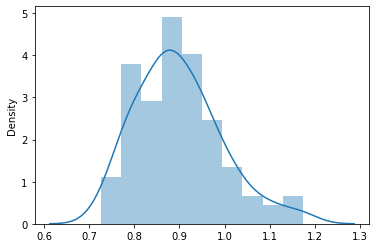

In [76]:
sns.distplot(boot_slopes)
plt.show()

Nice normal distribution of slopes

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


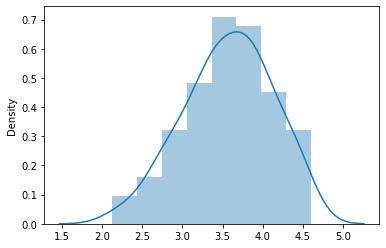

In [77]:
sns.distplot(boot_interc)
plt.show()

Kindof normal distribution of std_dev of slopes

The data above paints a pretty picture from parametric bootstrapping. However, if by chance, and this is more likely, we had sparse data, there may be a chance that our random selection of points are entirely in one area and not in another — recall the mention that the outlier can be sampled several times despite being a single outlying point.
To fight this, we can apply a different type of bootstrapping, called ‘non-parametric bootstrapping’ whereby we apply bootstrapping on the residuals, and not the parameter itself.  
  
#### Resample Residuals (Non-Parametric Bootstrapping)  
The idea is that we want to observe a point at every x-position that we have a point in the original data. Therefore, we fit the original data and re-shuffle the residuals at every point.
N.B: The assumption underlying our ability to do this is that the errors are independent and identically distributed (IID) among our data.

In [80]:
# create synthetic sample data
n_points = 25
x = np.linspace(0, 10, n_points)
y = x + (np.random.rand(len(x)) * 5)
data_df = pd.DataFrame({'x': x, 'y': y})
# fit linear regression model
ols_model = sm.ols(formula = 'y ~ x', data=data_df)
results = ols_model.fit()
# get predicted values
y_pred = results.predict(data_df['x'])
# get residual values
resids = results.resid

Now that we fitted the values and residuals from our least-squares fit, we generate N (100) new sets of data by **sampling the residuals and adding them to the fitted values:**

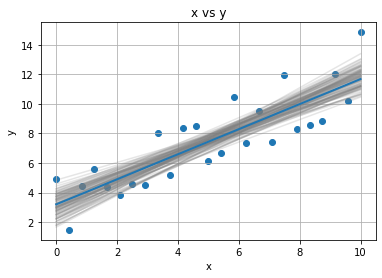

In [81]:
boot2_slopes = []
boot2_interc = []
n_boots = 100
plt.figure()
for _ in range(n_boots):
 # create a sampling of the residuals with replacement
 boot_resids = np.random.choice(resids, n_points, replace=True)
 y_temp = [y_pred_i + resid_i for y_pred_i, resid_i in zip(y_pred, boot_resids)]
 
 sample_df = pd.DataFrame({'x': list(x), 'y': y_temp})
 # Fit a linear regression
 ols_model_temp = sm.ols(formula = 'y ~ x', data=sample_df)
 results_temp = ols_model_temp.fit()
 
 # get coefficients
 boot2_interc.append(results_temp.params[0])
 boot2_slopes.append(results_temp.params[1])
 
 # plot a greyed out line
 y_pred_temp = ols_model_temp.fit().predict(sample_df['x'])
 plt.plot(sample_df['x'], y_pred_temp, color='grey', alpha=0.2)
# add data points
plt.scatter(x, y)
plt.plot(x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.show()


As before the lines converge more in the center.  
  
Again we check the distributions of the parameters:

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


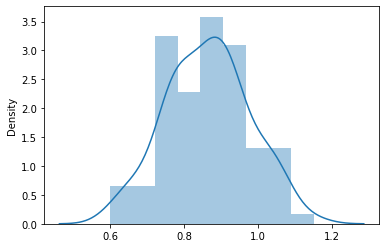

In [82]:
sns.distplot(boot2_slopes)
plt.show()

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


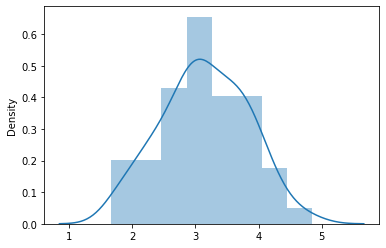

In [83]:
sns.distplot(boot2_interc)
plt.show()

This helps us understand ther error in our parameters with linear regression. In fact, this type of bootstrapping can be extended to most linear and non-linear models that have a unique, optimal solution. Using this methodology allows us to get an error distribution for every parameter!  
  
  
#### Conclusion  
Bootstrap is not the only resampling method, there are several, but IMO it is the among the best for production models because it makes minimal assumptions about the parent distribution and is well implemented into many languages and packages.  

In this article we looked at applying bootstrapping techniques to linear regression in two ways:  
  
**Parametric bootstrapping** — resampling from all of the points:  
  
1. Sample the data with replacement numerous times (100)
2. Fit a linear regression to each sample
3. Store the coefficients (intercept and slopes)
4. Plot a histogram of the parameters  
  
**Non-parametric boostrapping** — resampling on the residuals with an uneven distribution of feature values:  

1. Find the optimal linear regression on all the original data
2. Extract the residuals from the fit
3. Create new y-values using the residual samples
4. Fit the linear regression with the new y-values
5. Store the slope and intercepts
6. Plot a histogram of the parameters  
  
Like Ulysses himself in his “Odessy” — I hope I have created a simple narrative that helps illustrate bootstrap resampling in the context of linear regressions. Next I will continue writing about regression but with the added wrinkle of talking about overfitting and using regularization help with that!  
  
https://towardsdatascience.com/linear-regression-with-bootstrapping-4924c05d2a9